<a href="https://colab.research.google.com/github/Mario-bro777/ds/blob/main/CNN_for_FachionMNIST_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import torchvision as tv
import time
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE = 256

In [ ]:
transforms = tv.transforms.Compose([
    tv.transforms.Resize(32),
    tv.transforms.ToTensor()
])

In [ ]:
train_dataset = tv.datasets.FashionMNIST('.',
                                  train=True,
                                  transform=transforms,
                                  download=True)

test_dataset = tv.datasets.FashionMNIST('.',
                                 train=False,
                                 transform=transforms,
                                 download=True)

train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

100%|██████████| 26.4M/26.4M [00:00<00:00, 113MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 4.01MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 51.7MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.5MB/s]


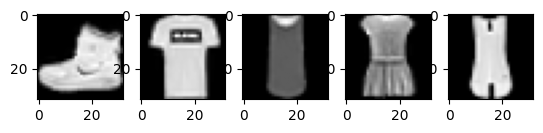

In [ ]:
fig, axs = plt.subplots(1,5)
for i in range(5):
  axs[i].imshow(train_dataset[i][0].numpy().reshape(32,32), cmap='gray');

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
model = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=0),
    nn.Tanh(),
    nn.AvgPool2d(2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5),
    nn.Tanh(),
    nn.AvgPool2d(2, stride=2),
    nn.Conv2d(16, 120, kernel_size=5),
    nn.Flatten(),
    nn.Linear(120, 84),
    nn.Tanh(),
    nn.Linear(84, 10)
)

In [ ]:
model = model.to(device)

In [ ]:
def evaluate_accuracy(data_iter, net, device):
    acc_sum, n = torch.Tensor([0]).to(device), 0
    for X, y in data_iter:
        X, y = X.to(device), y.to(device)
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [ ]:
def train(net, train_iter, test_iter, optimizer, num_epochs, device):
    loss = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()

        for X, y in train_iter:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]

        test_acc = evaluate_accuracy(test_iter, net, device)
        print(f'epoch {epoch + 1}, loss {train_l_sum / n:.4f}, train acc {train_acc_sum / n:.3f}' \
              f', test acc {test_acc:.3f}, time {time.time() - start:.1f} sec')

In [ ]:
lr, num_epochs = 0.001, 30
trainer = torch.optim.SGD(model.parameters(), lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs, device)

epoch 1, loss 0.0090, train acc 0.094, test acc 0.118, time 13.1 sec
epoch 2, loss 0.0090, train acc 0.167, test acc 0.215, time 11.0 sec
epoch 3, loss 0.0089, train acc 0.212, test acc 0.213, time 11.1 sec
epoch 4, loss 0.0089, train acc 0.207, test acc 0.211, time 11.2 sec
epoch 5, loss 0.0088, train acc 0.220, test acc 0.220, time 11.0 sec
epoch 6, loss 0.0087, train acc 0.229, test acc 0.227, time 10.7 sec
epoch 7, loss 0.0087, train acc 0.241, test acc 0.243, time 11.2 sec
epoch 8, loss 0.0085, train acc 0.257, test acc 0.262, time 11.2 sec
epoch 9, loss 0.0084, train acc 0.277, test acc 0.289, time 11.2 sec
epoch 10, loss 0.0081, train acc 0.313, test acc 0.336, time 11.5 sec
epoch 11, loss 0.0078, train acc 0.381, test acc 0.425, time 11.2 sec
epoch 12, loss 0.0074, train acc 0.476, test acc 0.511, time 11.2 sec
epoch 13, loss 0.0070, train acc 0.529, test acc 0.528, time 11.2 sec
epoch 14, loss 0.0065, train acc 0.529, test acc 0.520, time 11.1 sec
epoch 15, loss 0.0061, train 

In [ ]:
trainer = torch.optim.SGD(model.parameters(), lr=0.01)
train(model, train_iter, test_iter, trainer, num_epochs, device)

epoch 1, loss 0.0031, train acc 0.715, test acc 0.718, time 11.1 sec
epoch 2, loss 0.0030, train acc 0.725, test acc 0.725, time 11.3 sec
epoch 3, loss 0.0028, train acc 0.733, test acc 0.730, time 11.3 sec
epoch 4, loss 0.0027, train acc 0.738, test acc 0.735, time 11.3 sec
epoch 5, loss 0.0027, train acc 0.744, test acc 0.740, time 11.1 sec
epoch 6, loss 0.0026, train acc 0.749, test acc 0.746, time 10.6 sec
epoch 7, loss 0.0025, train acc 0.755, test acc 0.751, time 10.9 sec
epoch 8, loss 0.0025, train acc 0.760, test acc 0.755, time 11.0 sec
epoch 9, loss 0.0024, train acc 0.766, test acc 0.759, time 11.1 sec
epoch 10, loss 0.0024, train acc 0.770, test acc 0.764, time 11.0 sec
epoch 11, loss 0.0023, train acc 0.775, test acc 0.767, time 11.1 sec
epoch 12, loss 0.0023, train acc 0.780, test acc 0.771, time 11.2 sec
epoch 13, loss 0.0022, train acc 0.784, test acc 0.775, time 11.1 sec
epoch 14, loss 0.0022, train acc 0.788, test acc 0.778, time 11.1 sec
epoch 15, loss 0.0022, train 